### Data Preprocessing with Python - Removing Outliers

#### Importing relevant libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Reading Data

In [5]:
df1 = pd.read_csv('minutes_watched_2021_paid_0.csv')
df2 = pd.read_csv('minutes_watched_2022_paid_0.csv')
df3 = pd.read_csv('minutes_watched_2021_paid_1.csv')
df4 = pd.read_csv('minutes_watched_2022_paid_1.csv')

#### Initail data exploration

In [7]:
df1

,student_id,minutes_watched,paid_in_q2_2021
0,767,0.05,0
1,902,34.62,0
2,1067,0.27,0
3,1151,122.35,0
4,1395,133.52,0
...,...,...,...
5329,158745,0.15,0
5330,158749,10.95,0
5331,158750,0.37,0
5332,158754,5.47,0


In [8]:
df1.minutes_watched.describe()

count    5334.000000
mean       18.519818
std        59.230376
min         0.030000
25%         0.430000
50%         2.900000
75%        16.620000
max      1577.520000
Name: minutes_watched, dtype: float64

In [9]:
df2

,student_id,minutes_watched,paid_in_q2_2022
0,389,0.15,0
1,666,2.83,0
2,801,5732.58,0
3,875,46.77,0
4,1357,0.12,0
...,...,...,...
6050,279813,0.28,0
6051,279825,0.25,0
6052,279852,1.75,0
6053,279870,0.38,0


In [10]:
df2.minutes_watched.describe()

count    6055.000000
mean       20.124756
std        85.892006
min         0.030000
25%         0.860000
50%         5.120000
75%        22.150000
max      5732.580000
Name: minutes_watched, dtype: float64

In [11]:
df3

,student_id,minutes_watched,paid_in_q2_2021
0,6,81.03,1
1,516,46.27,1
2,520,91.18,1
3,523,1322.25,1
4,594,3.73,1
...,...,...,...
2300,158205,275.27,1
2301,158260,132.95,1
2302,158413,19.60,1
2303,158482,0.45,1


In [12]:
df3.minutes_watched.describe()

count     2305.000000
mean       415.395328
std        772.214146
min          0.050000
25%         33.000000
50%        165.580000
75%        499.520000
max      14334.330000
Name: minutes_watched, dtype: float64

In [13]:
df4

,student_id,minutes_watched,paid_in_q2_2022
0,6,67.08,1
1,616,116.02,1
2,618,238.15,1
3,699,222.35,1
4,702,1.60,1
...,...,...,...
2781,278995,67.40,1
2782,279264,202.50,1
2783,279519,184.20,1
2784,279625,50.78,1


In [14]:
df4.minutes_watched.describe()

count    2786.000000
mean      325.486536
std       544.856501
min         0.050000
25%        30.307500
50%       122.925000
75%       389.445000
max      6464.820000
Name: minutes_watched, dtype: float64

#### Plotting the Distributions

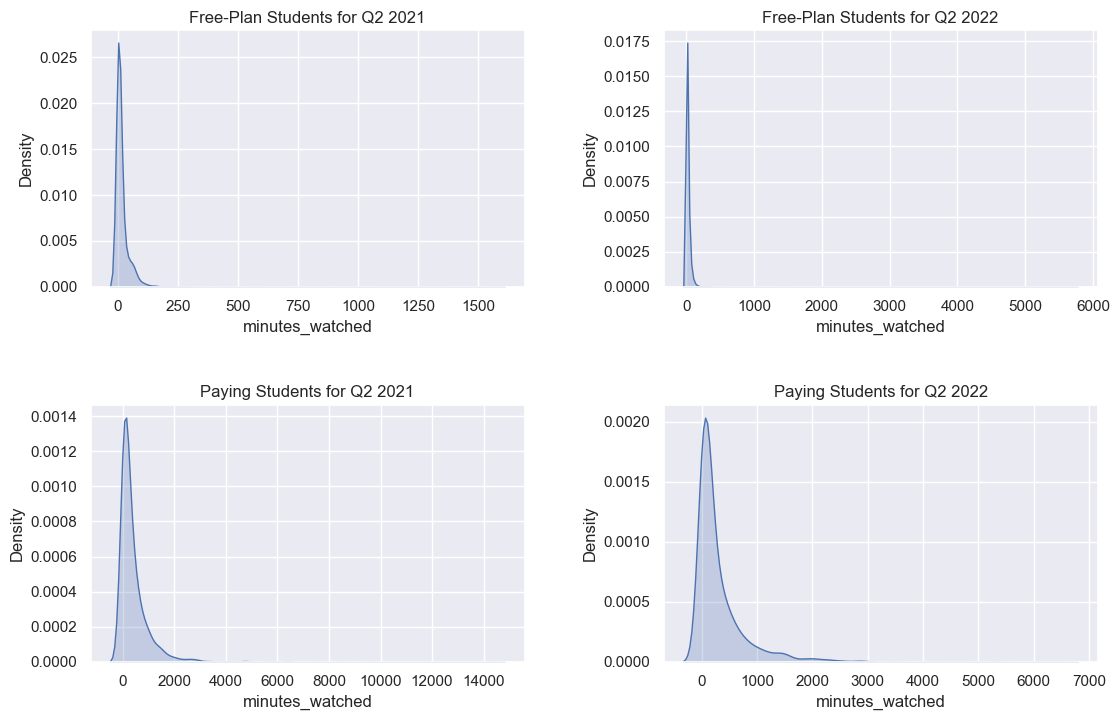

In [16]:
fig,axes = plt.subplots(2,2,figsize=(12,8))

sns.kdeplot(df1.minutes_watched,fill=True,ax=axes[0,0])
axes[0,0].set_title('Free-Plan Students for Q2 2021')

sns.kdeplot(df2.minutes_watched,fill=True,ax=axes[0,1])
axes[0,1].set_title('Free-Plan Students for Q2 2022')

sns.kdeplot(df3.minutes_watched,fill=True,ax=axes[1,0])
axes[1,0].set_title('Paying Students for Q2 2021')

sns.kdeplot(df4.minutes_watched,fill=True,ax=axes[1,1])
axes[1,1].set_title('Paying Students for Q2 2022')

fig.tight_layout(pad=3.0)
plt.show()

#### Checking for outliers

In [18]:
df1_99_quantile = df1.minutes_watched.quantile(.99)
df1_99_quantile

167.08470000000017

In [19]:
df2_99_quantile = df2.minutes_watched.quantile(.99)
df2_99_quantile

170.26300000000015

In [20]:
df3_99_quantile = df3.minutes_watched.quantile(.99)
df3_99_quantile

3390.482800000001

In [21]:
df4_99_quantile = df4.minutes_watched.quantile(.99)
df4_99_quantile

2505.3450000000003

#### Removing outliers

In [23]:
df1 = df1[df1['minutes_watched']<df1_99_quantile]
df2 = df2[df2['minutes_watched']<df2_99_quantile]
df3 = df3[df3['minutes_watched']<df3_99_quantile]
df4 = df4[df4['minutes_watched']<df4_99_quantile]

In [24]:
df1

,student_id,minutes_watched,paid_in_q2_2021
0,767,0.05,0
1,902,34.62,0
2,1067,0.27,0
3,1151,122.35,0
4,1395,133.52,0
...,...,...,...
5329,158745,0.15,0
5330,158749,10.95,0
5331,158750,0.37,0
5332,158754,5.47,0


In [25]:
df2

,student_id,minutes_watched,paid_in_q2_2022
0,389,0.15,0
1,666,2.83,0
3,875,46.77,0
4,1357,0.12,0
5,1373,45.92,0
...,...,...,...
6050,279813,0.28,0
6051,279825,0.25,0
6052,279852,1.75,0
6053,279870,0.38,0


In [26]:
df3

,student_id,minutes_watched,paid_in_q2_2021
0,6,81.03,1
1,516,46.27,1
2,520,91.18,1
3,523,1322.25,1
4,594,3.73,1
...,...,...,...
2300,158205,275.27,1
2301,158260,132.95,1
2302,158413,19.60,1
2303,158482,0.45,1


In [27]:
df4

,student_id,minutes_watched,paid_in_q2_2022
0,6,67.08,1
1,616,116.02,1
2,618,238.15,1
3,699,222.35,1
4,702,1.60,1
...,...,...,...
2781,278995,67.40,1
2782,279264,202.50,1
2783,279519,184.20,1
2784,279625,50.78,1


#### Visualizing the filtered data

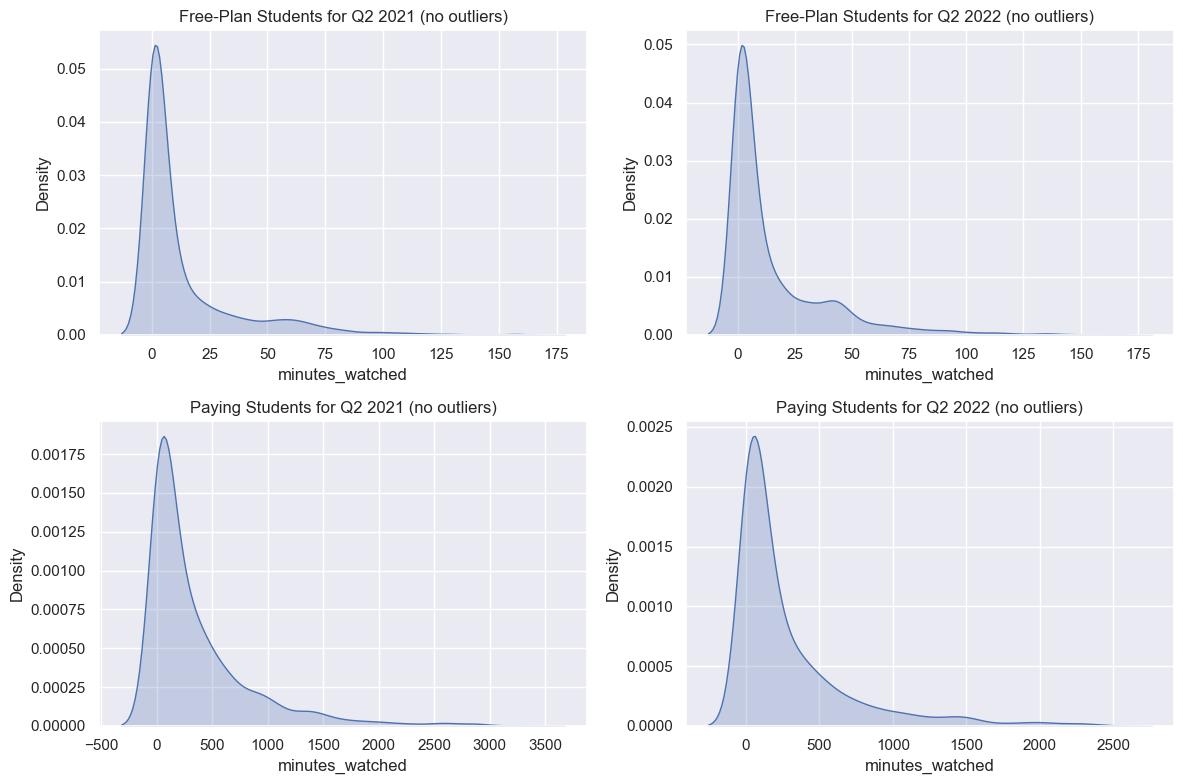

In [54]:
fig,axes = plt.subplots(2,2,figsize=(12,8))

sns.kdeplot(df1.minutes_watched,fill=True,ax=axes[0,0])
axes[0,0].set_title('Free-Plan Students for Q2 2021 (no outliers)')

sns.kdeplot(df2.minutes_watched,fill=True,ax=axes[0,1])
axes[0,1].set_title('Free-Plan Students for Q2 2022 (no outliers)')

sns.kdeplot(df3.minutes_watched,fill=True,ax=axes[1,0])
axes[1,0].set_title('Paying Students for Q2 2021 (no outliers)')

sns.kdeplot(df4.minutes_watched,fill=True,ax=axes[1,1])
axes[1,1].set_title('Paying Students for Q2 2022 (no outliers)')

plt.tight_layout()
plt.show()

#### Saving the data to CSV files

In [57]:
df1.to_csv('minutes_watched_2021_paid_0_no_outliers.csv',index=False)
df2.to_csv('minutes_watched_2022_paid_0_no_outliers.csv',index=False)
df3.to_csv('minutes_watched_2021_paid_1_no_outliers.csv',index=False)
df4.to_csv('minutes_watched_2022_paid_1_no_outliers.csv',index=False)